# Logistic Regression

## Introduction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

## Loading Datasets

In [3]:
TRAIN_SET = './datasets/train_catvnoncat.h5'
TEST_SET = './datasets/test_catvnoncat.h5'

train_h5 = h5py.File(TRAIN_SET, 'r')
test_h5 = h5py.File(TEST_SET, 'r')

print("Training Group Keys: ", train_h5.keys())
print("Test Group Keys: ", train_h5.keys())

Training Group Keys:  <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
Test Group Keys:  <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


In [4]:
train_set_x = train_h5['train_set_x'].value
train_set_y = train_h5['train_set_y'].value


test_set_x = test_h5['test_set_x'].value
test_set_y = test_h5['test_set_y'].value

classes = train_h5['list_classes'].value

train_h5.close()
test_h5.close()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
# Reshaping y of test and train
train_set_y.resize((train_set_y.shape[0],1))
test_set_y.resize((test_set_y.shape[0],1))

train_set_y = train_set_y.T
test_set_y = test_set_y.T

(1, 209)

## Visualizing Dataset

In [6]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]

num_px = train_set_x.shape[1]

print ("Number of training examples: m_train = ", str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train =  209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


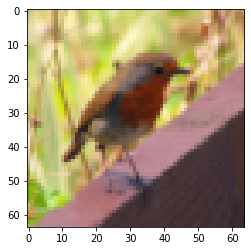

In [7]:
plt.imshow(train_set_x[10])

## Flatten Dataset

In [8]:
train_set_x_flatten = train_set_x.reshape(m_train, -1).T
test_set_x_flatten = test_set_x.reshape(m_test, -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [9]:
train_x = train_set_x_flatten/255.
test_x = test_set_x_flatten/255.

## Architecture of the learning algorithm

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [11]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**:
    <table>
      <tr>
        <td>**sigmoid([0, 2])**</td>
        <td> [ 0.5         0.88079708]</td>
      </tr>
    </table>

In [12]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    
    dw = np.dot(X,(A - Y).T) / m
    db = np.sum(A - Y) / m
    
    cost = np.squeeze(cost)
    return dw, db, cost
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
dw, db,  cost = propagate(w, b, X, Y)
print ("dw = " + str(dw))
print ("db = " + str(db))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return w, b, costs

w, b, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True)
print ("w = " + str(w))
print ("b = " + str(b))

Cost after iteration 0: 6.000065
w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891


In [14]:
def predict(w, b, X):
    y_pred = np.zeros((1, X.shape[0]))
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[0]):
        y_pred = np.around(A)
        
    return y_pred
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [15]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w = np.zeros((X_train.shape[0], 1))
    b = 0
    
    w, b, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    y_pred_train = predict(w, b, X_train)
    y_pred_test = predict(w, b, X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - Y_test)) * 100))
    
    return w, b, costs, y_pred_train, y_pred_test


In [16]:
w_cat, b_cat, costs, y_pred_train, y_pred_test = model(train_x, train_set_y, test_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


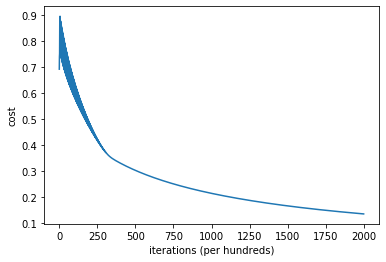

In [17]:
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()